# DS4023 Machine Learning : SVM Exercise

This exercise contains two parts: in the first part, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs; in the second part of the exercise, you will be using support vector machines to build a spam classifier.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm
from scipy.io import loadmat

## Part 1: SVM with  2D datasets

### 1.1 Linear SVM (``svm.LinearSVC()``)

In [4]:
raw_data = loadmat('2Ddata1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

Plot the data use scatter plot:

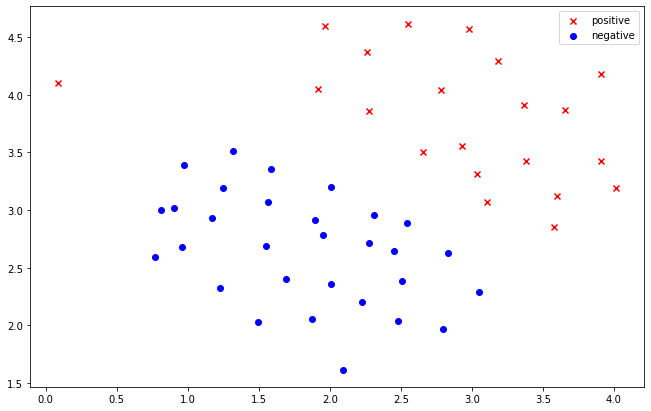

In [23]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
# data
# plot the data use scatter plot...
plt.figure(figsize=(11,7))
data_1 = data[data["y"]==1]
data_0 = data[data["y"]==0]
plt.scatter(data_1["X1"], data_1["X2"], marker = "x", color = "red")
plt.scatter(data_0["X1"], data_0["X2"], marker = "o", color = "blue")
plt.legend(labels = ["positive", "negative"])

Notice that there is an outlier positive example on the far left. As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

Recall that for soft margin case, we allow error for some examples: $$min_{w,b} \frac{1}{2} ||w||^2+ C\sum_i \epsilon_i$$ 

In [13]:
svc = svm.LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
# try linear svm with C (penalty for error) set to 1 and uses hing loss, iteration set to 1,000,000
svc

LinearSVC(C=1, loss='hinge', max_iter=1000000)

In [35]:
# fit the model and make prediction to check the performance
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values
svm_model = svc.fit(X,y)
# check the performance of training set
pred = svm_model.predict(X)
acc = np.sum((data['y'] - pred) == 0) / len(data)
acc

0.9803921568627451

Try use larger penalty for the error, i.e., $C=1000$, to compare the model.

In [22]:
# try linear svm with larger C, hinge loss and iteration set to 1,000,000
svc2 = svm.LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

# fit the model
svm_model2 = svc2.fit(X,y)
# make prediction to check the performance
pred = svm_model2.predict(X)
acc = np.sum((data['y'] - pred) == 0) / len(data)
acc

1.0

By increasing the value of $C$, we get a perfect classifier on the training dataset. However, we obtain an inappropriate decision boundary by visualizing the classifier.

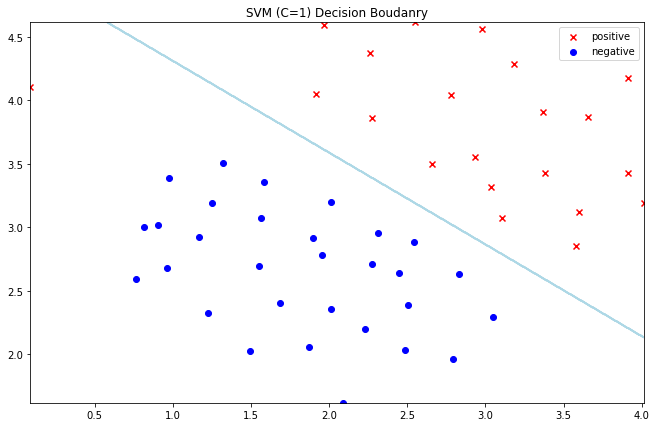

In [40]:
def plot_decision_boundary(svm_clf, title):
    # plot the decision boundary
    plt.figure(figsize=(11,7))
    data_1 = data[data["y"]==1]
    data_0 = data[data["y"]==0]
    plt.scatter(data_1["X1"], data_1["X2"], marker = "x", color = "red")
    plt.scatter(data_0["X1"], data_0["X2"], marker = "o", color = "blue")
    plt.legend(labels = ["positive", "negative"])
    plt.title(title)
    f_min, f_max = X[:,0].min()*1.1, X[:,0].max()*1.1
    l_min, l_max = X[:,1].min()*1.1,X[:,1].max()*1.2
    xx,yy = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),1000), np.linspace(X[:,1].min(),X[:,1].max(),1000))
    
    input = np.c_[xx.ravel(),yy.ravel()]
    pred = svm_clf.predict(input).reshape(xx.shape)
    plt.contour(xx,yy,pred,colors="lightblue")
    
plot_decision_boundary(svc,'SVM (C=1) Decision Boudanry')

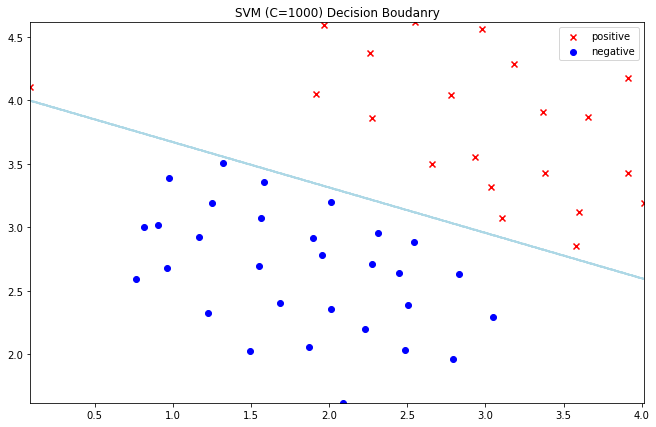

In [41]:
plot_decision_boundary(svc2,'SVM (C=1000) Decision Boudanry')

### 1.2 Non-linear SVM with Gaussian Kernel (``svm.SVC()``)
Next, try using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the *distance* between a pair of examples,
$(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\delta$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

Complement the function ``GaussianKernel`` to compute the gaussian kernel between two examples.

In [78]:
def GaussianKernel(x1, x2, sigma):
    # finish gaussian kernal
    gaussian = np.exp(-((x1 - x2)**2).sum() / (2*sigma**2))
    return gaussian

The following to examples are used to test your ``GaussianKernel`` function, the expected output should be 0.32465.

In [79]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2
GaussianKernel(x1, x2, sigma)

0.32465246735834974

Load ``2Ddata2.mat`` and plot the data.

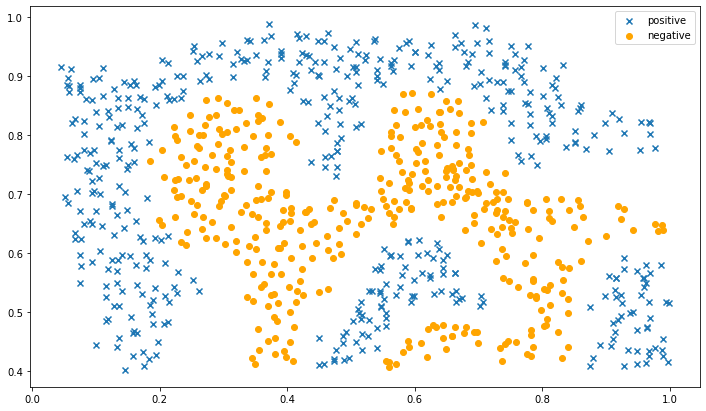

In [80]:
raw_data = loadmat('2Ddata2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

# plot the data 
plt.figure(figsize=(12,7))
data_1 = data[data["y"]==1]
data_0 = data[data["y"]==0]
plt.scatter(data_1["X1"], data_1["X2"], marker = "x")
plt.scatter(data_0["X1"], data_0["X2"], marker = "o", color = "orange")
plt.legend(labels = ["positive", "negative"])

From the figure, we can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset (``svm.SVC()``). 

In [81]:
# try svm.SVC with parameters C=1000, gamma=100, probability=True
svc = svm.SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=100, kernel= "rbf",
      max_iter=-1, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
svc

SVC(C=1000, gamma=100, probability=True)

In [82]:
# fit the model and check the performance
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
svc.fit(X, y)
pred = svc.predict(X)
# check the accuracy
acc = np.sum((y - pred) == 0) / len(y)

Plot the decision boundary for nonlinear svm

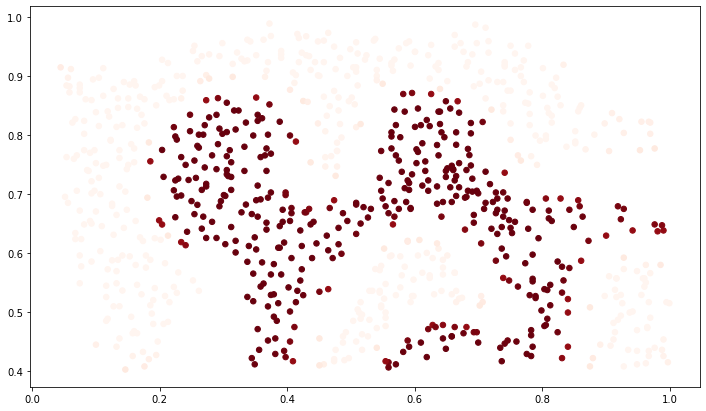

In [83]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

Try find the optimal parameters using grid search.
You should write any additional code necessary to help you search over the parameters $C$ and $\delta$. For both $C$ and $\delta$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for $C$ and $\delta$. 

In [93]:
raw_data = loadmat('2Ddata3.mat')
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
best_params = {'C': None, 'gamma': None}
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

data_valid = pd.DataFrame(raw_data['Xval'], columns=['X1', 'X2'])
data_valid['y'] = raw_data['yval']
X_valid = data_valid.iloc[:, :2].values
y_valid = data_valid.iloc[:, -1].values
best_acc = 0
# your implementation for finding parameters
for c in C_values:
    for gamma in gamma_values:
        svm_model = svm.SVC(C=c, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=gamma, kernel='rbf',
              max_iter=-1, probability=True, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
        # Fit model and predit the validation data
        svm_model.fit(X, y)
        pred = svm_model.predict(X_valid)
        acc = np.sum((pred - valid_label) == 0) / len(y_valid)
        # if current parameters can get a better result
        # it will update the record 
        if acc > best_acc:
            best_acc = acc
            best_params["C"] = c
            best_params["gamma"] = gamma

In [17]:
best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

## Part 2: SVM with  2D datasets

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

In [95]:
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')
spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [101]:
# your implementation for spam filter using SVM ...
# output the performance for your classifier
data_train= pd.DataFrame(spam_train["X"])
data_train['y'] = spam_train['y']

data_test = pd.DataFrame(spam_test["Xtest"])
data_test['y'] = spam_test['ytest']

X_train = data_train.iloc[:, :-1]
y_train = data_train['y']
X_test = data_test.iloc[:, :-1]
y_test = data_test['y']

spam_svm = svm.SVC(C=0.1, kernel='linear')
spam_svm.fit(X_train, y_train)

pred = spam_model.predict(X_test)
acc = np.sum((pred-y_test)==0) / len(test_label)
acc

0.989